In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from datetime import datetime
import cvxpy
from collections import defaultdict
from oracles import Oracle
from optimization import *

%matplotlib inline

In [2]:
data = pd.read_csv('stocks_data.csv', delimiter=',')
data = data[1:-1]
data = data.loc[:, data.columns != 'Unnamed: 0']

data = data.fillna(0)

In [13]:
r = np.mean(data, axis=0).values

n = r.shape[0]
Sigma = np.cov(data.values.astype(float).T) + np.diag(np.ones(n) * 1e-5)
lambd = 0.01

np.random.seed(1)
x0 = np.random.uniform(0, 1, size=n)

In [14]:
orac = Oracle(Sigma, r, lambd, 1, mode='cvxpy')
fista_cvx = FISTA(orac, x0/ np.sum(x0), max_iter=500, trace=True)[2]
acg_cvx = AcceleratedProximalGD(orac, x0/ np.sum(x0), max_iter=500, trace=True)[2]

In [15]:
orac = Oracle(Sigma, r, lambd, 1, mode='efficient')
fista_nocvx = FISTA(orac, x0/ np.sum(x0), max_iter=500, trace=True)[2]
acg_nocvx = AcceleratedProximalGD(orac, x0/ np.sum(x0), max_iter=500, trace=True)[2]

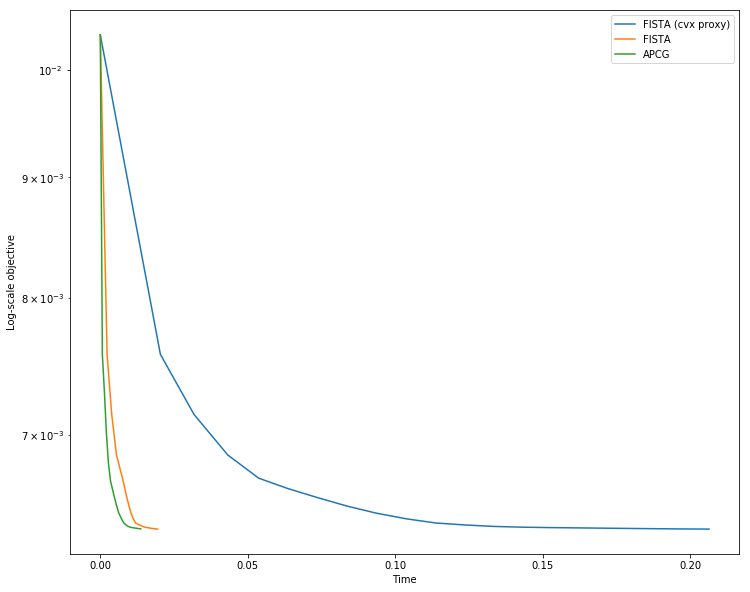

In [16]:
plt.figure(figsize=(12,10))
plt.plot(fista_cvx['time'][:20], fista_cvx['func'][:20], label = 'FISTA (cvx proxy)')
plt.plot(fista_nocvx['time'][:20], fista_nocvx['func'][:20], label = 'FISTA')
plt.plot(acg_nocvx['time'][:20], acg_nocvx['func'][:20], label = 'APCG')
plt.xlabel('Time')
plt.ylabel('Log-scale objective')
plt.yscale('log')
plt.legend(loc='best')

In [23]:
admm = ADMM(orac, x0/np.sum(x0), 0.3, max_iter=5000, trace=True)[2]

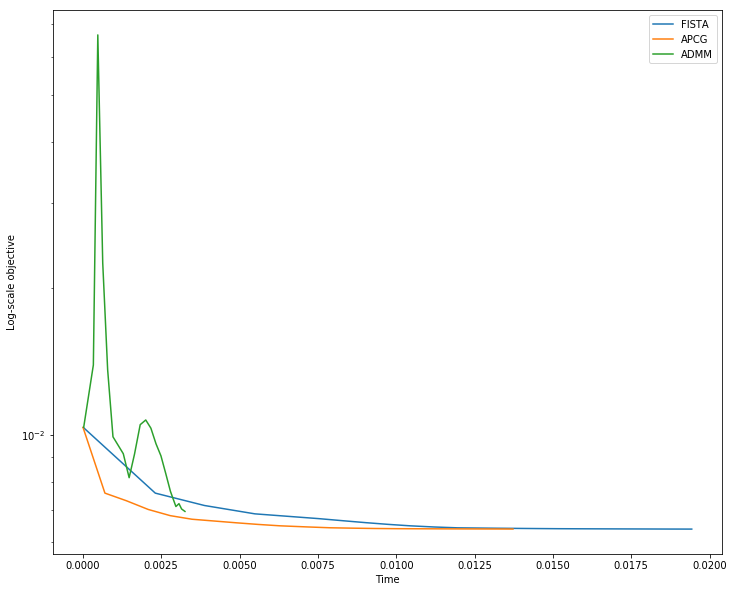

In [24]:
plt.figure(figsize=(12,10))
plt.plot(fista_nocvx['time'][:20], fista_nocvx['func'][:20], label = 'FISTA')
plt.plot(acg_nocvx['time'][:20], acg_nocvx['func'][:20], label = 'APCG')
plt.plot(admm['time'][:20], admm['func'][:20], label = 'ADMM')
plt.xlabel('Time')
plt.ylabel('Log-scale objective')
plt.yscale('log')
plt.legend(loc='best')